# Muse Dataset (To find emotions of songs)

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the data 
muse = pandas.read_csv('muse_v3.csv')
muse.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal


In [3]:
# Drop columns with missing values
muse = muse.dropna(axis=1)

# Drop columns except track, artist and seeds
columns_to_keep = ['track', 'artist', 'seeds']
muse = muse[columns_to_keep]
muse

,track,artist,seeds
0,'Till I Collapse,Eminem,['aggressive']
1,St. Anger,Metallica,['aggressive']
2,Speedin',Rick Ross,['aggressive']
3,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']"
4,Die MF Die,Dope,['aggressive']
...,...,...,...
89996,Battle,Gaby Hoffmann & Jay Duplass,['transparent']
89997,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent']
89998,Crookfield Zoo,Ace White,['transparent']
89999,Transparent (Full Version),Second Chyld,['transparent']


In [4]:
# Find rows with only multiple seeds value and drop them
print(f"Before dropping rows with multiple seed values {len(muse['seeds'])}")

multiple_seed_rows = muse[muse['seeds'].str.contains(',')]
print(f"Rows with multiple seed values {len(multiple_seed_rows)}")

muse = muse.drop(multiple_seed_rows.index)
print(f"After dropping rows with multiple seed values {len(muse['seeds'])}")

muse.head()

Before dropping rows with multiple seed values 90001
Rows with multiple seed values 18067
After dropping rows with multiple seed values 71934


,track,artist,seeds
0,'Till I Collapse,Eminem,['aggressive']
1,St. Anger,Metallica,['aggressive']
2,Speedin',Rick Ross,['aggressive']
4,Die MF Die,Dope,['aggressive']
5,Step Up,Drowning Pool,['aggressive']


In [5]:
# Finding the top 10 seeds
top_seeds = muse.groupby('seeds').size().sort_values(ascending=False).head(10)
print(top_seeds)

seeds
['sleazy']       938
['lazy']         835
['exotic']       799
['martial']      799
['fierce']       792
['organic']      784
['lyrical']      775
['gritty']       770
['erotic']       766
['technical']    763
dtype: int64


In [6]:
# Finding how many rows have the top 10 seeds
rows_with_top_seeds = top_seeds.index
rows_with_top_seeds = muse[muse['seeds'].isin(rows_with_top_seeds)]
print(f"Rows with top 10 seeds: {len(rows_with_top_seeds)}")

Rows with top 10 seeds: 8021


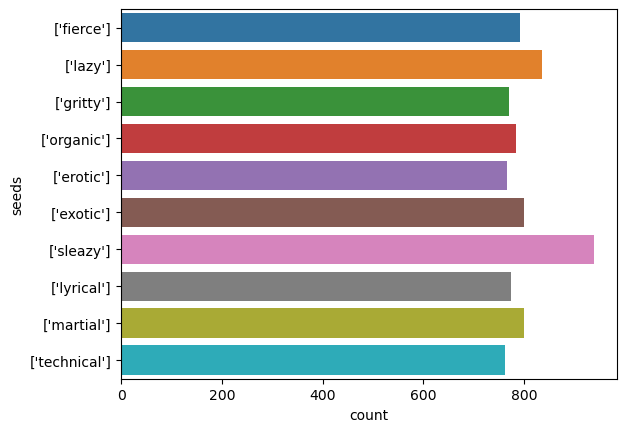

In [7]:
# Plotting the top 10 seeds in rows_with_top_seeds
sns.countplot(y='seeds', data=rows_with_top_seeds)
plt.show()

In [8]:
print(len(rows_with_top_seeds))
print(len(muse))

8021
71934


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
rows_with_top_seeds = rows_with_top_seeds.copy()
rows_with_top_seeds.loc[:, 'seeds'] = label_encoder.fit_transform(rows_with_top_seeds['seeds'])
rows_with_top_seeds.head()


/var/folders/07/79cfrfvn7xxcbq5fw3dz694c0000gn/T/ipykernel_3725/1913885437.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  rows_with_top_seeds.loc[:, 'seeds'] = label_encoder.fit_transform(rows_with_top_seeds['seeds'])


,track,artist,seeds
3047,Whip My Hair,Willow Smith,2
3058,Ghost Town,Adam Lambert,2
3059,Hard,Rihanna,2
3060,Whatever U Like,Nicole Scherzinger,2
3070,Slob,Weezer,2


In [10]:
# Show how many types of seeds are there
print(f"Number of types of seeds: {len(rows_with_top_seeds['seeds'].unique())}")

Number of types of seeds: 10


In [11]:
# One hot encoding the seeds
#one_hot_seeds = pandas.get_dummies(rows_with_top_seeds['seeds'])
#one_hot_seeds.head()

In [12]:
# print the row where the track is Whip My Hair
#muse[muse['track'] == 'Whip My Hair']

In [13]:
# Applying label encoding to the seeds
# rows_with_top_seeds = rows_with_top_seeds.drop('seeds', axis=1)
# rows_with_top_seeds = rows_with_top_seeds.join(one_hot_seeds)
# rows_with_top_seeds.head()


In [14]:
# Checking if we applied one hot encoding correctly
#display(rows_with_top_seeds[rows_with_top_seeds['track'] == 'Whip My Hair'])
#display(muse[muse['track'] == 'Whip My Hair'])

# Genius API (To get lyrics of songs)

In [15]:
# https://lyricsgenius.readthedocs.io/en/master/index.html

!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /private/var/folders/07/79cfrfvn7xxcbq5fw3dz694c0000gn/T/pip-req-build-v7ahob9n
  Running command git clone --filter=blob:none --quiet https://github.com/johnwmillr/LyricsGenius.git /private/var/folders/07/79cfrfvn7xxcbq5fw3dz694c0000gn/T/pip-req-build-v7ahob9n
  Resolved https://github.com/johnwmillr/LyricsGenius.git to commit bec02665b807941ca95e045be910e861789fc4a7
  Preparing metadata (setup.py) ... done


In [16]:
# Your Genius access token
token = input("Enter your Genius access token: ")

In [17]:
from lyricsgenius import Genius
genius = Genius(token)

In [18]:
# Turn off status messages
genius.verbose = False

# Remove section headers (e.g. [Chorus]) from lyrics when searching
genius.remove_section_headers = True

# Include hits thought to be non-songs (e.g. track lists)
genius.skip_non_songs = False

# Exclude songs with these words in their title
genius.excluded_terms = ["(Remix)", "(Live)"]

In [19]:
# get the first row of the rows_with_top_seeds dataframe
#rows_with_top_seeds.iloc[0]['artist']

In [20]:
# drop all lyrics columns
#rows_with_top_seeds = rows_with_top_seeds.drop(['lyrics'], axis=1)

In [21]:
# Defining a function to cleaning the punctuation from the lyrics
from string import punctuation

def clean_lyrics(lyrics):
    lyrics = [line.lower() for line in lyrics]
    lyrics = [' '.join(line.split()) for line in lyrics]
    lyrics = [' '.join([word for word in line.split() if word.strip()]) for line in lyrics]
    lyrics = [' '.join([word for word in line.split() if word.strip() and word not in punctuation]) for line in lyrics]
    # Removing non-ascii characters
    lyrics = [line.encode('ascii', 'ignore').decode('ascii') for line in lyrics]
    lyrics = ' '.join(lyrics)
    
    return lyrics

In [22]:
# Defining a function that returns the cleaned lyrics of a song
def get_lyrics(artist, track):
    song = genius.search_song(track, artist,)
    if song is None:
        print(f"Could not find lyrics for {track} by {artist}")
        return None
    lines = song.lyrics.split('\n')
    # Skip the first line because it is irrelevant
    lyrics = '\n'.join(lines[1:])
    lyrics = lyrics.split()

    lyrics = clean_lyrics(lyrics)
    return lyrics

In [23]:
# An example of how to use the get_lyrics function
get_lyrics(rows_with_top_seeds.iloc[0]['artist'], rows_with_top_seeds.iloc[0]['track'])

"i whip my hair back and forth i whip my hair back and forth (just whip it) i whip my hair back and forth i whip my hair back and forth (whip it real good) i whip my hair back and forth i whip my hair back and forth i whip my hair back and forth i whip my hair back and forth hop up out the bed, turn my swag on pay no attention to them haters because we whip 'em off and we aint doin' nothin' wrong so dont tell me nothin' im just trying to have fun so keep the party jumping so what's up? (yeah) and now they don't know what to do we turn our back and whip our hair and just shake 'em off, shake 'em off shake 'em off, shake 'em off dont let haters get me off my grind whip my hair, if i know ill be fine keep fighting until i get there when im down and i feel like giving up (i think again) you might also like i whip my hair back and forth i whip my hair back and forth (just whip it) i whip my hair back and forth i whip my hair back and forth (whip it real good) i whip my hair back and forth i

In [24]:
# Shuffle the rows_with_top_seeds dataframe
rows_with_top_seeds = rows_with_top_seeds.sample(frac=1).reset_index(drop=True)
rows_with_top_seeds.head()

,track,artist,seeds
0,Now,Wonder Girls,2
1,I Want A Little Girl,Solomon Burke,4
2,Pump It,The Black Eyed Peas,1
3,Talk to Your Daughter,Bulletboys,8
4,Oh How It Feels,:Wumpscut:,3


In [25]:
# Iterate over rows with iterrows()
# and add the lyrics for each row

counter = 0
# Iterate 300 rows
for index, row in rows_with_top_seeds.iterrows():
    if counter >= 300:
        break
    print(f'Iterating over row {index} out of {len(rows_with_top_seeds)}')
    artist = row['artist']
    track = row['track']
    counter += 1
    # if get_lyrics raises an error, skip the row
    try:
        lyrics = get_lyrics(artist, track)
        if lyrics is not None:
            rows_with_top_seeds.at[index, 'lyrics'] = lyrics
        else:
            print(f"Could not find lyrics for {track} by {artist}")
            rows_with_top_seeds.at[index, 'lyrics'] = None
    except:
        print(f"Could not find lyrics for {track} by {artist}")
        rows_with_top_seeds.at[index, 'lyrics'] = None

    

Iterating over row 0 out of 8021
Iterating over row 1 out of 8021
Iterating over row 2 out of 8021
Iterating over row 3 out of 8021
Iterating over row 4 out of 8021
Could not find lyrics for Oh How It Feels by :Wumpscut:
Could not find lyrics for Oh How It Feels by :Wumpscut:
Iterating over row 5 out of 8021
Iterating over row 6 out of 8021
Iterating over row 7 out of 8021
Iterating over row 8 out of 8021
Iterating over row 9 out of 8021
Iterating over row 10 out of 8021
Iterating over row 11 out of 8021
Could not find lyrics for Götterdämmerung In Ruinen by Von Thronstahl
Could not find lyrics for Götterdämmerung In Ruinen by Von Thronstahl
Iterating over row 12 out of 8021
Could not find lyrics for tappetinho by Alex Cazumba
Could not find lyrics for tappetinho by Alex Cazumba
Iterating over row 13 out of 8021
Could not find lyrics for Kehnde Ne Naina by Devika
Could not find lyrics for Kehnde Ne Naina by Devika
Iterating over row 14 out of 8021
Iterating over row 15 out of 8021
Coul

In [26]:
# drop lyrics column
#rows_with_top_seeds = rows_with_top_seeds.drop(['lyrics'], axis=1)

In [27]:
rows_with_top_seeds

,track,artist,seeds,lyrics
0,Now,Wonder Girls,2,i wish i wasn't alive i really hate my life i ...
1,I Want A Little Girl,Solomon Burke,4,ext. north bachman road day (harry awakens in...
2,Pump It,The Black Eyed Peas,1,"i don't get breaks, i just make time i don't g..."
3,Talk to Your Daughter,Bulletboys,8,"mama, papa, please talk to you daughter for me..."
4,Oh How It Feels,:Wumpscut:,3,None
...,...,...,...,...
8016,Should Be Loved,Blue October,5,NaN
8017,I Got My Education (Bootleggers Response),Uncanny Alliance,2,NaN
8018,Kelvin K - Ancestral Moon (Groovenauts Remix),Kelvin K,7,NaN
8019,I'm Wild About That Thing,Steinski,0,NaN


In [28]:
# Drop columns with Nan values for lyrics
rows_with_top_seeds = rows_with_top_seeds.dropna(subset=['lyrics'])
rows_with_top_seeds

,track,artist,seeds,lyrics
0,Now,Wonder Girls,2,i wish i wasn't alive i really hate my life i ...
1,I Want A Little Girl,Solomon Burke,4,ext. north bachman road day (harry awakens in...
2,Pump It,The Black Eyed Peas,1,"i don't get breaks, i just make time i don't g..."
3,Talk to Your Daughter,Bulletboys,8,"mama, papa, please talk to you daughter for me..."
5,The Big Bang,Katy Tiz,3,"oh, babe i don't wanna lie i'm gonna take what..."
...,...,...,...,...
292,You Wreck Me,Taking Back Sunday,5,"tonight we sail, on a radio song rescue me, sh..."
293,Tap That,Megan McCauley,2,"uh uh uh huh huh oh snap, look at that there y..."
294,Goal,Spiderbait,4,"surasiu a tave, bomba, yeah (chorus) surasiu a..."
296,Equivalent Equilibrium,Cryptopsy,9,cling to level ground balancing ability side w...


In [29]:
# Drop track and artist columns
rows_with_top_seeds = rows_with_top_seeds.drop(['track', 'artist'], axis=1)
rows_with_top_seeds

,seeds,lyrics
0,2,i wish i wasn't alive i really hate my life i ...
1,4,ext. north bachman road day (harry awakens in...
2,1,"i don't get breaks, i just make time i don't g..."
3,8,"mama, papa, please talk to you daughter for me..."
5,3,"oh, babe i don't wanna lie i'm gonna take what..."
...,...,...
292,5,"tonight we sail, on a radio song rescue me, sh..."
293,2,"uh uh uh huh huh oh snap, look at that there y..."
294,4,"surasiu a tave, bomba, yeah (chorus) surasiu a..."
296,9,cling to level ground balancing ability side w...


In [30]:
# Save the dataframe to a csv file
rows_with_top_seeds.to_csv('final_dataset.csv', index=False)